In [146]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [147]:
crimes.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object

In [148]:
crimes["hour_occ"] = crimes["TIME OCC"].str[:2]

In [149]:
peak_crime_hour = int(crimes["hour_occ"].value_counts().index[0])
peak_crime_hour

12

In [150]:
crimes["TIME OCC"] = crimes["TIME OCC"].str[:2]+":"+crimes["TIME OCC"].str[2:]

In [151]:
crimes["TIME OCC"] = pd.to_datetime(crimes["TIME OCC"], format='%H:%M').dt.time

In [152]:
night_start = pd.to_datetime("22:00",format='%H:%M').time()
night_end = pd.to_datetime("03:59", format="%H:%M").time()

In [153]:
crimes["is_night_crime"] = [True if (time >= night_start or time <= night_end ) else False for time in crimes["TIME OCC"]]

In [154]:
display(crimes)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,hour_occ,is_night_crime
0,220314085,2022-07-22,2020-05-12,11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,False
1,222013040,2022-08-06,2020-06-04,16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,False
2,220614831,2022-08-18,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,False
3,231207725,2023-02-27,2020-01-27,06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,06,False
4,220213256,2022-07-14,2020-07-14,09:00:00,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185710,231510379,2023-05-29,2023-05-25,11:00:00,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV,11,False
185711,231604807,2023-01-27,2023-01-26,18:00:00,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST,18,False
185712,231606525,2023-03-22,2023-03-22,10:00:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST,10,False
185713,231210064,2023-04-12,2023-04-12,16:30:00,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV,16,False


In [155]:
peak_night_crime_location = crimes.groupby("AREA NAME")["is_night_crime"].count().sort_values(ascending=False).index[0]
peak_night_crime_location

'Central'

In [156]:
labels = ["0-17","18-25","26-34","35-44","45-54","55-64","65+"]
bins = [0,17,25,34,44,54,64,crimes["Vict Age"].max()]

In [157]:
crimes["age_group"] = pd.cut(crimes["Vict Age"], labels=labels, bins=bins)

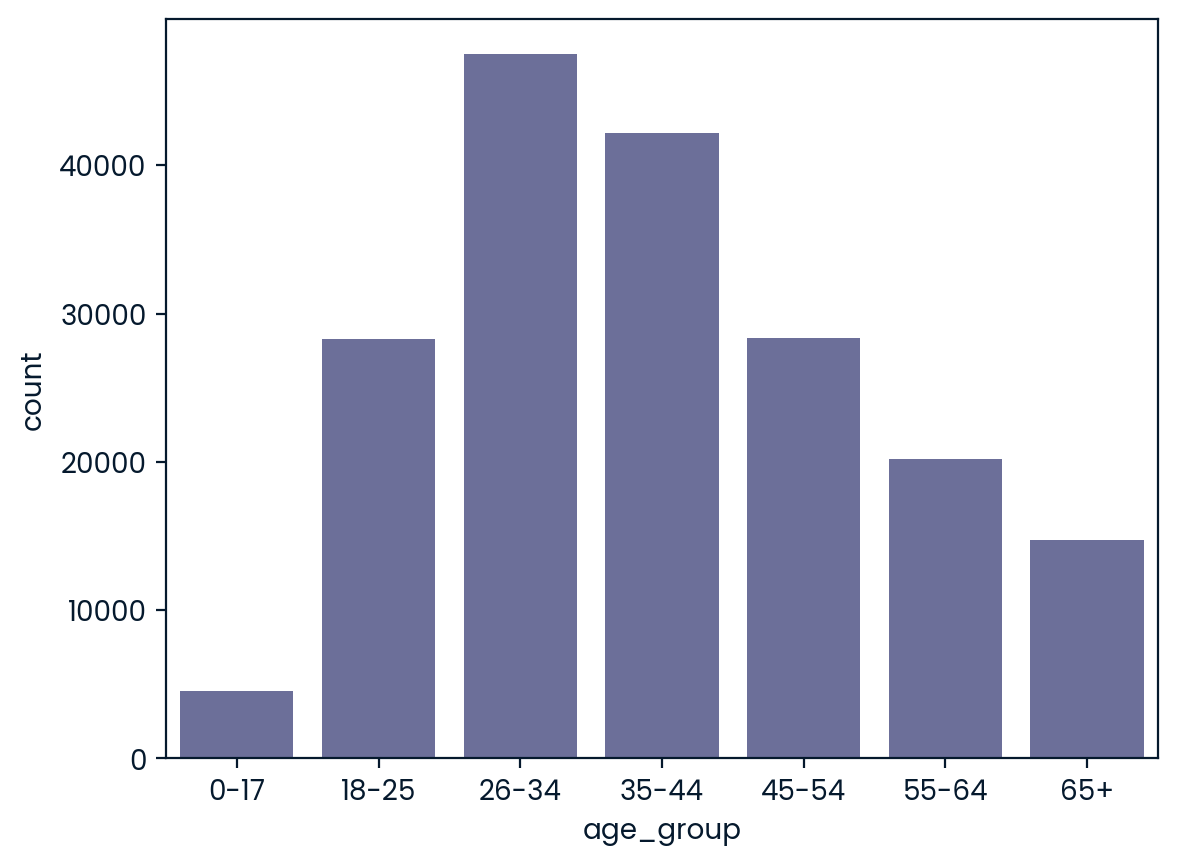

In [158]:
sns.countplot(data=crimes, x="age_group")
plt.show()

In [159]:
victim_ages = crimes["age_group"].value_counts()
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: age_group, dtype: int64